#### Importing libraries

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
housing_df = pd.read_csv('datasets/housing.csv', header = None)
housing_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing_df.shape

(506, 14)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(housing_df.values[:, :-1],
                                                    housing_df.values[:, -1],
                                                    test_size=0.2,
                                                    random_state = 0)
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train, X_test = (X_train - mean)/std, (X_test-mean)/std
# X_test = np.column_stack( (np.ones((X_test.shape[0], 1)), X_test) )

In [7]:
from ml_algs.linear_regression import LinearRegression

### Closed-Form Solution

$ \hat{\theta} = (X^T.X)^{-1}X^T.y $

In [8]:
lr = LinearRegression(optimizer=None)
lr.fit(X_train, y_train)

y_hat_test = lr.predict(X_test)
print(f'RMSE {lr.rmse(y_test, y_hat_test)}')
print(f'MSE: {lr.mse(y_test, y_hat_test)}') 

Data matrix is Full-rank. Closed-form-solution exists.
RMSE 5.783509053791393
MSE: 33.44897697528702


### Closed-Form Solution with L2-Regularization

$ \hat{\theta} = (X^T.X + \lambda.I)^{-1}X^T.y$

In [9]:
lr = LinearRegression(optimizer=None,
                      penalty='l2',
                      lambda_ = 1)
lr.fit(X_train, y_train)

y_hat_test = lr.predict(X_test)

print(f'RMSE: {lr.rmse(y_test, y_hat_test)}')
print(f'MSE: {lr.mse(y_test, y_hat_test)}') 

Data matrix is Full-rank. Closed-form-solution exists.
RMSE: 5.793846834702777
MSE: 33.56866114399539


### Batch-Gradient Descent

  2%|▏         | 81/5000 [00:00<00:02, 2076.48it/s]

The model stopped learning - Converged in 81 steps(iterations)
RMSE: 5.808750643468277
MSE: 33.741584037993114


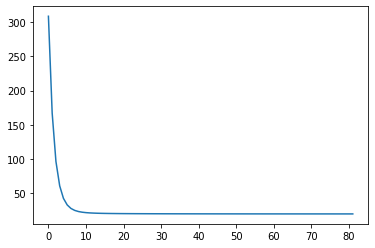

In [10]:
lr = LinearRegression(learning_rate=0.3,
                      optimizer='gradient_descent',
                      loss = 'mse')

lr.fit(X_train, y_train)

y_hat_test = lr.predict(X_test)

print(f'RMSE: {lr.rmse(y_test, y_hat_test)}')
print(f'MSE: {lr.mse(y_test, y_hat_test)}') 

plt.plot(lr.errors)
plt.show()

### Mini-Batch Gradient Descent

  1%|          | 62/5000 [00:00<00:02, 1999.59it/s]

The model stopped learning - Converged in 62 steps(iterations)
RMSE: 5.862546290304158
MSE: 34.36944900595904


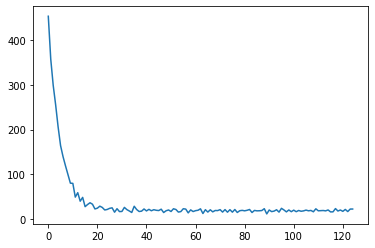

In [11]:
lr = LinearRegression(learning_rate=0.1,
                      optimizer='gd',
                      loss = 'mse',
                      batch_size=256,
                      tolerance=0.1)

lr.fit(X_train, y_train)

y_hat_test = lr.predict(X_test)

print(f'RMSE: {lr.rmse(y_test, y_hat_test)}')
print(f'MSE: {lr.mse(y_test, y_hat_test)}') 

plt.plot(lr.errors)
plt.show()

### Online Gradient Descent

  0%|          | 0/5000 [00:00<?, ?it/s]


The model stopped learning - Converged in 0 steps(iterations)
RMSE: 9.063083903960544
MSE: 82.13948985022871


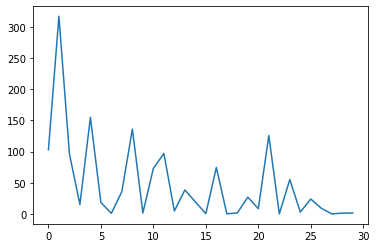

In [12]:
lr = LinearRegression(learning_rate=0.05,
                      optimizer='gradient_descent',
                      loss = 'mse',
                      batch_size=1,
                      tolerance=0.1)

lr.fit(X_train, y_train)

y_hat_test = lr.predict(X_test)

print(f'RMSE: {lr.rmse(y_test, y_hat_test)}')
print(f'MSE: {lr.mse(y_test, y_hat_test)}') 

plt.plot(lr.errors)
plt.show()